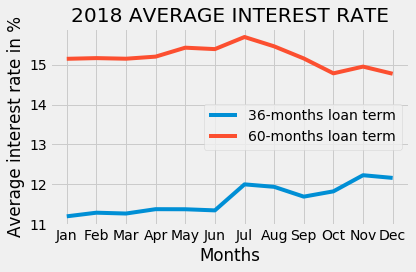

In [3]:
#  DATA_ANALYSIS_01
#   This Program is designed to analyse the data from the loan1.csv
#   ... and a line graph is plotted to to show the Average interest rate of each month in 2018 of LC
#   The data been analyzed is gotten from LendingClub Statistics through kaggle.com

# importing the libraries the would be used
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import csv
from itertools import zip_longest

#   preset styling of the graph
plt.style.use('fivethirtyeight')

#   defining a function that evaluate the average interest rate for each corresponding month (jan-18 to Dec-18)
#       where x is assigned to issue_d and y is term (... loan issue date and corresponding loan term)
def avg_int_rate(x, y):
#   opening the csv file i would be reading the data from

    loan_sheet = pd.read_csv('loan1.csv')
    issue_date = loan_sheet['issue_d']
    loan_term = loan_sheet['term']
#   adding up the interest rate
    t_int_rate = loan_sheet.loc[(issue_date == x) & (loan_term == y), 'int_rate'].sum()
#   evaluating the total count of the corresponding loan count
    c_int_rate = loan_sheet.loc[(issue_date == x) & (loan_term == y), 'int_rate'].count()
#   average interest rate
    a_int_rate = t_int_rate/c_int_rate
    return a_int_rate

#   defining the main program function where the data would be analysed

def main():
#   opening the csv file
    loan_sheet = pd.read_csv('loan1.csv')
    issue_d_month = loan_sheet['issue_d']

    issue_d_count = Counter()

    for month in issue_d_month:
        issue_d_count.update(month.split(','))


    ini_months = []
    for key, value in issue_d_count.items():
        ini_months.append(key[3:9])
# Arranging the months in the right order
    ini_months.reverse()

    months = ini_months

#   evaluating the average interest rate of the short term loan which is 36 months
    avg_int_rate_short = []

    avg_total_short = [avg_int_rate('18-Jan', ' 36 months'),
                       avg_int_rate('18-Feb', ' 36 months'),
                       avg_int_rate('18-Mar', ' 36 months'),
                       avg_int_rate('18-Apr', ' 36 months'),
                       avg_int_rate('18-May', ' 36 months'),
                       avg_int_rate('18-Jun', ' 36 months'),
                       avg_int_rate('18-Jul', ' 36 months'),
                       avg_int_rate('18-Aug', ' 36 months'),
                       avg_int_rate('18-Sep', ' 36 months'),
                       avg_int_rate('18-Oct', ' 36 months'),
                       avg_int_rate('18-Nov', ' 36 months'),
                       avg_int_rate('18-Dec', ' 36 months'),
                       ]
    for item in avg_total_short:
        avg_int_rate_short.append(item)

#   evaluating the average interest rate of the long term loan which is 60 months
    avg_int_rate_long = []

    avg_total_long = [avg_int_rate('18-Jan', ' 60 months'),
                       avg_int_rate('18-Feb', ' 60 months'),
                       avg_int_rate('18-Mar', ' 60 months'),
                       avg_int_rate('18-Apr', ' 60 months'),
                       avg_int_rate('18-May', ' 60 months'),
                       avg_int_rate('18-Jun', ' 60 months'),
                       avg_int_rate('18-Jul', ' 60 months'),
                       avg_int_rate('18-Aug', ' 60 months'),
                       avg_int_rate('18-Sep', ' 60 months'),
                       avg_int_rate('18-Oct', ' 60 months'),
                       avg_int_rate('18-Nov', ' 60 months'),
                       avg_int_rate('18-Dec', ' 60 months'),
                       ]
    for item in avg_total_long:
        avg_int_rate_long.append(item)

#   plotting the graph
#   this first plot is going to be the average interest rate of the short term loan vs. the months

    plt.plot(months, avg_int_rate_short , label='36-months loan term')

    plt.plot(months, avg_int_rate_long, label='60-months loan term')

    plt.xlabel("Months")
    plt.ylabel("Average interest rate in %")
    plt.title("2018 AVERAGE INTEREST RATE")
    plt.tight_layout()
    plt.legend()

#   Writing the data extracted ("months", "avg_int_rate_short", "avg_int_rate_long") in another csv file
#       This would be used to design the charts in the Dashboard
    d = [months, avg_int_rate_short, avg_int_rate_long]
    export_data = zip_longest(*d, fillvalue='')
    with open('avg_int_amnt.csv', 'w', encoding="ISO-8859-1", newline='') as myfile:
        wr = csv.writer(myfile)
        wr.writerow(("months", "avg_int_rate_short", "avg_int_rate_long"))
        wr.writerows(export_data)
    myfile.close()
    # --------- end of written doc. -------------

    plt.show()


main()

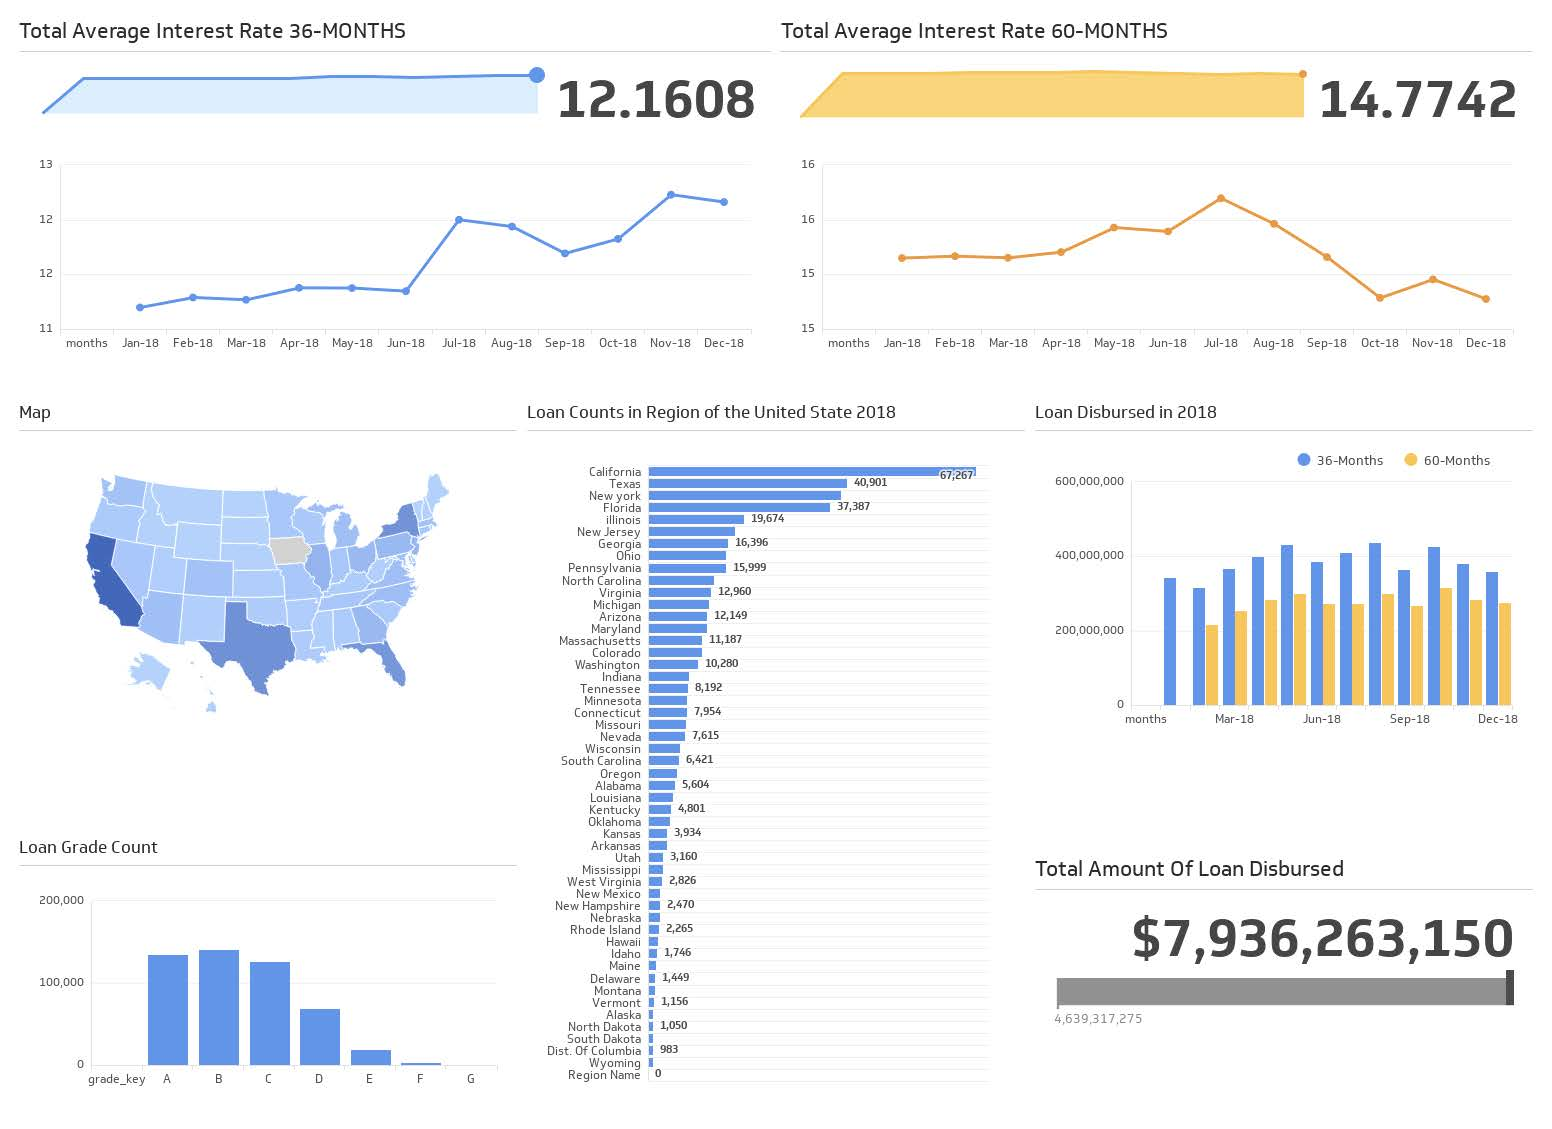